In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
from os import listdir
from os.path import isfile, join
import numpy as np

def breakData(dataTrain, dataLabel, breakPoint):
    totalTime = dataTrain.shape[2]
    lsTrain = []
    lsLabel = []
    bCount = int(totalTime / breakPoint)
    print("bCount:",bCount)
    for e in range(bCount):
        print("from:",breakPoint*e," to:",breakPoint*(e+1))
        lsTrain.append(dataTrain[:,:,breakPoint*e:breakPoint*(e+1)][0])
        lsLabel.append(dataLabel[0][0])
    if totalTime % breakPoint > 0:
        print("from:",(totalTime-breakPoint)," to:",totalTime)
        lsTrain.append(dataTrain[:,:,(totalTime-breakPoint):totalTime][0])
        lsLabel.append(dataLabel[0][0])

    print("breakdata:",np.array(lsTrain).shape)
    return lsTrain,lsLabel
def viewAllDataFromFolder(dataPath,lablePath,breakPoint):
    onlyfiles = [f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    count = 0
    fileLs = []
    lsBdTrain = None
    lsBdLabel = None
    for fs in onlyfiles:
        print(fs)
        count = count + 1
        with open(lablePath+"/"+fs, 'rb') as f:
            dataLabel = np.load(f)
        with open(dataPath+"/"+fs, 'rb') as f:
            dataTrain = np.load(f)
        print("dataTrain.shape:",dataTrain.shape,"  dataLabel.shape:",dataLabel.shape," label value:",dataLabel[0])
        print(dataTrain[:,:,:121].shape)
        bdTrain,bdLabel = breakData(dataTrain,dataLabel, breakPoint)
        if count == 1:
            lsBdTrain = np.array(bdTrain)
            lsBdLabel = np.array(bdLabel)
        else:
            lsBdTrain = np.append(lsBdTrain,bdTrain,axis=0)
            lsBdLabel = np.append(lsBdLabel,bdLabel,axis=0)
    lsBdLabel = lsBdLabel.reshape((lsBdLabel.shape[0],1))
    print("Shape lsBdTrain:",lsBdTrain.shape," lsBdLabel:",lsBdLabel.shape)
    return lsBdTrain,lsBdLabel

# Run with CPU ONLY

In [309]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

1622491650-tan-k3
dataTrain.shape: (1, 12, 439)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 318  to: 439
breakdata: (4, 12, 121)
1622467500-tan-k3
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-k2
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-km
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622539650-tan-k3
dataTrain.shape: (1, 12, 235)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 1
from: 0  to: 121
from: 114  to: 2

In [310]:
trainData.shape
# trainData = np.delete(trainData, [1,2,3,9,10,11], 1)
trainData = np.delete(trainData, [1,2,3,4,5,6,7,8,9,10,11], 1)
# trainData = np.delete(trainData, [1,2,3,5,6,7,8,9,10,11], 1)

(31, 1, 121)


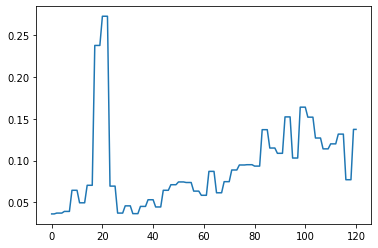

In [311]:
print(trainData.shape)
plt.plot(trainData[0][0]) 
plt.show()

In [312]:
for e in range(trainData.shape[1]):
#     e = 0
    trainData[:,e,:] = (trainData[:,e,:] - trainData[:,e,:].mean()) / (trainData[:,e,:].std())
#     print(trainData[:,e,:])


(31, 1, 121)
0


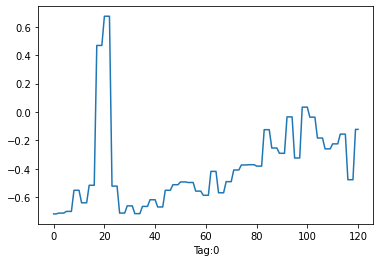

1


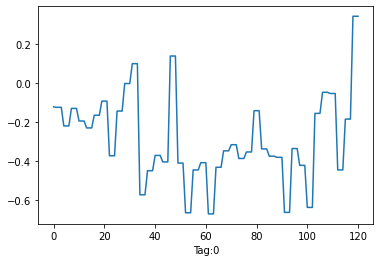

2


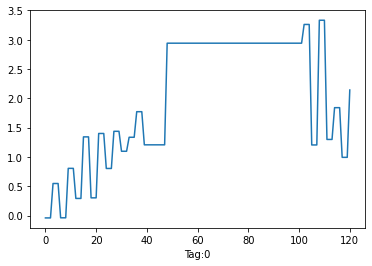

3


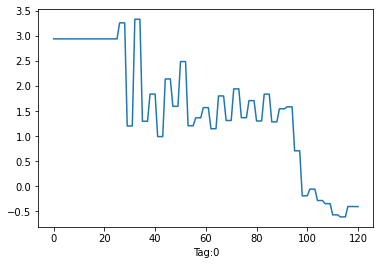

4


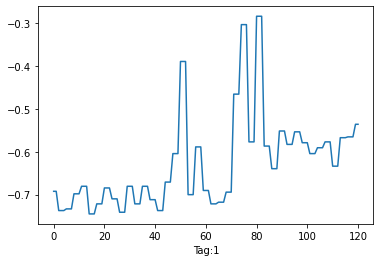

5


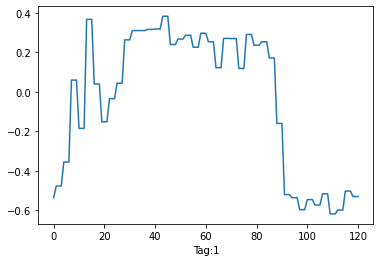

6


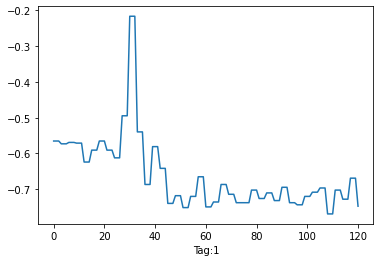

7


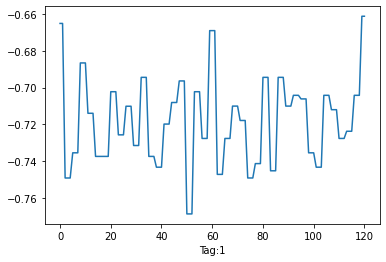

8


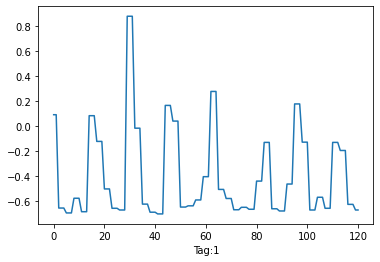

9


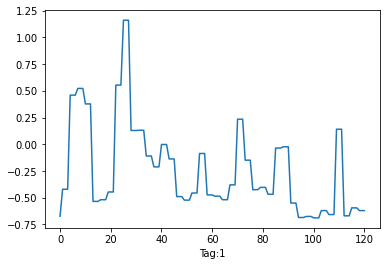

10


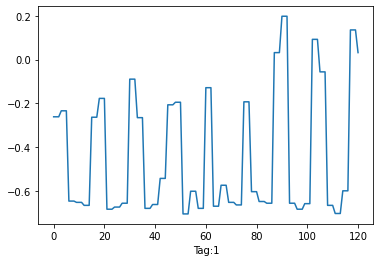

11


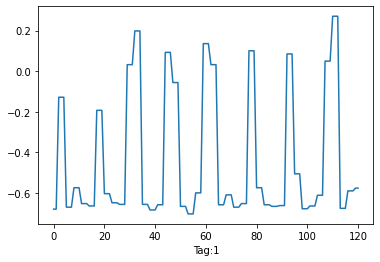

12


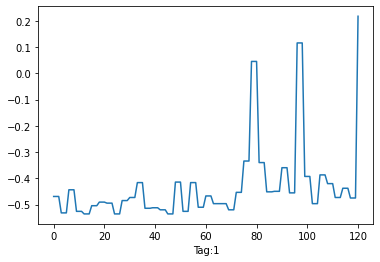

13


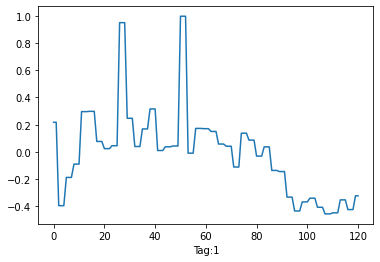

14


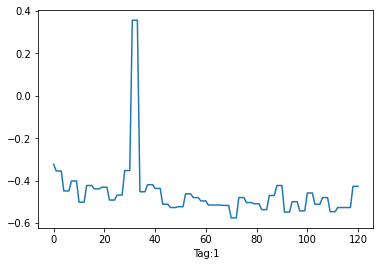

15


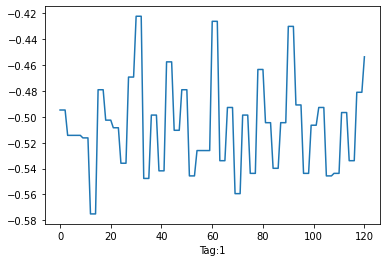

16


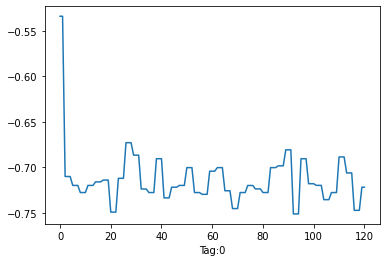

17


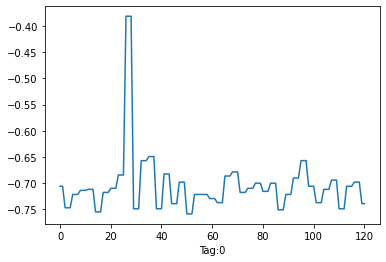

18


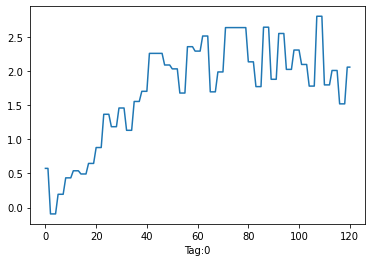

19


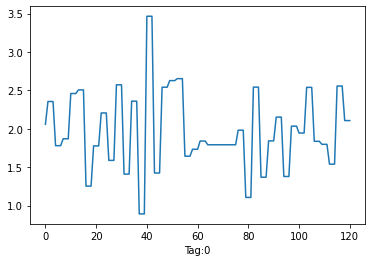

20


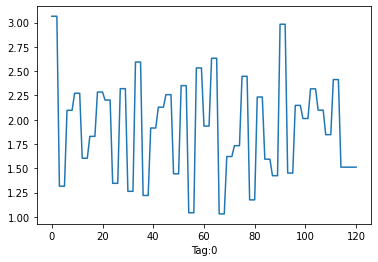

21


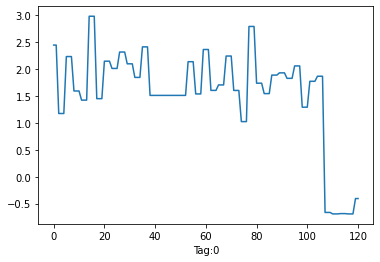

22


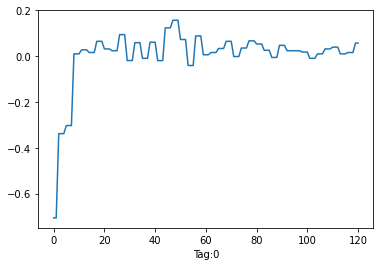

23


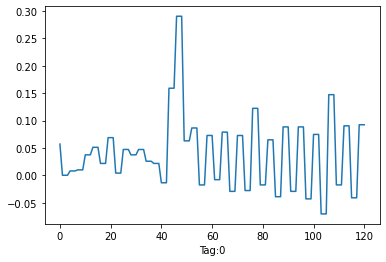

24


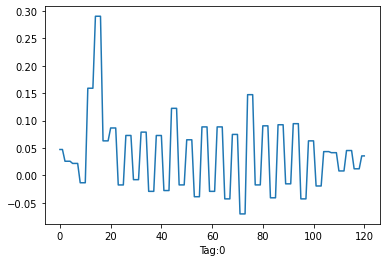

25


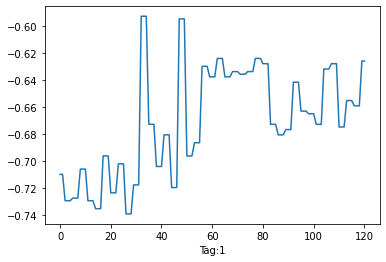

26


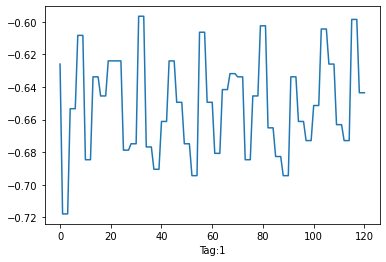

27


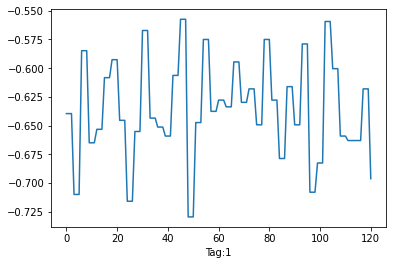

28


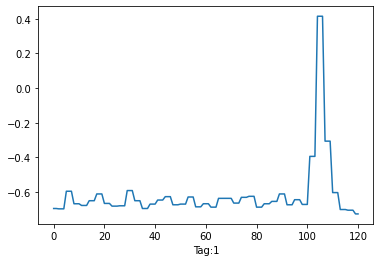

29


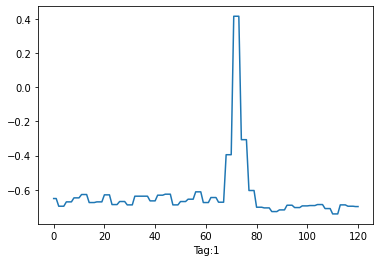

30


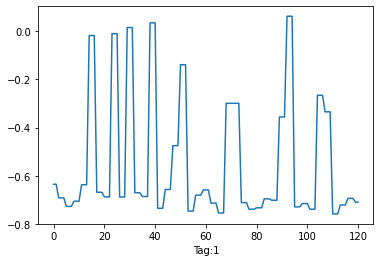

In [314]:
print(trainData.shape)
metrixIndex = 0
for e in range(trainData.shape[0]):
    print(e)
    plt.plot(trainData[e][metrixIndex]) 
    plt.xlabel("Tag:"+str(labelData[e][0]))
    plt.show()

In [315]:
# define LSTM
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(20,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(labelData.shape[1], activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_14 (Bidirectio (None, 1, 40)             22720     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 1)              41        
Total params: 22,761
Trainable params: 22,761
Non-trainable params: 0
_________________________________________________________________


In [263]:
# model = keras.Sequential()
# model.add(
#     keras.layers.Bidirectional(
#       keras.layers.LSTM(
#           units=64,
#           input_shape=[trainData.shape[1], trainData.shape[2]]
#       )
#     )
# )
# # model.add(keras.layers.Dropout(rate=0.5))
# model.add(keras.layers.Dense(units=128, activation='relu'))
# model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['acc']
# )

In [316]:
history = model.fit(
    trainData, labelData,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/100
1/1 [==============================] - 1s 645ms/step - loss: 0.7521 - accuracy: 0.3750 - val_loss: 0.6800 - val_accuracy: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7004 - accuracy: 0.5833 - val_loss: 0.6400 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6549 - accuracy: 0.7500 - val_loss: 0.6027 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6157 - accuracy: 0.7917 - val_loss: 0.5683 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5828 - accuracy: 0.8333 - val_loss: 0.5369 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5561 - accuracy: 0.8333 - val_loss: 0.5086 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5348 - accuracy: 0.8333 - val_loss: 0.4832 - val_accuracy: 1.0000
Epoch 8/100
1/1 [==

In [317]:
e = 1
y_pred = model.predict(np.array(trainData))
# print(np.array([trainData[0]]).shape)
print(labelData)
y_pred

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[[0.19848907]],

       [[0.41225424]],

       [[0.00859725]],

       [[0.00907111]],

       [[0.72122335]],

       [[0.9468361 ]],

       [[0.7740937 ]],

       [[0.6658932 ]],

       [[0.9214462 ]],

       [[0.92186105]],

       [[0.8459606 ]],

       [[0.90401983]],

       [[0.7407488 ]],

       [[0.90398574]],

       [[0.8587098 ]],

       [[0.75066763]],

       [[0.69730026]],

       [[0.620165  ]],

       [[0.01180181]],

       [[0.01435402]],

       [[0.01246449]],

       [[0.00827941]],

       [[0.33939737]],

       [[0.36002225]],

       [[0.39409927]],

       [[0.69299316]],

       [[0.677014  ]],

       [[0.7130039 ]],

       [[0.5392819 ]],

       [[0.78088856]],

       [[0.8231625 ]]], dtype=float32)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


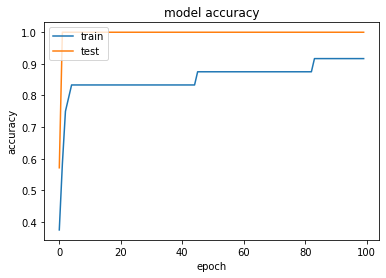

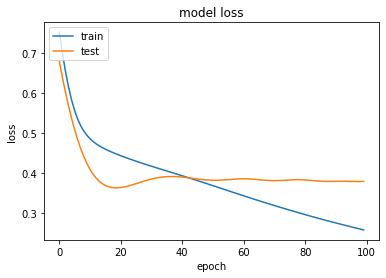

In [318]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Work with CPU and Memory

In [321]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

1622491650-tan-k3
dataTrain.shape: (1, 12, 439)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 318  to: 439
breakdata: (4, 12, 121)
1622467500-tan-k3
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-k2
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-km
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622539650-tan-k3
dataTrain.shape: (1, 12, 235)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 1
from: 0  to: 121
from: 114  to: 2

In [322]:
trainData.shape
# trainData = np.delete(trainData, [1,2,3,9,10,11], 1)
# trainData = np.delete(trainData, [1,2,3,4,5,6,7,8,9,10,11], 1)
trainData = np.delete(trainData, [1,2,3,4,5,7,8,9,10,11], 1)

train shape: (31, 2, 121)  label shape: (31, 1)


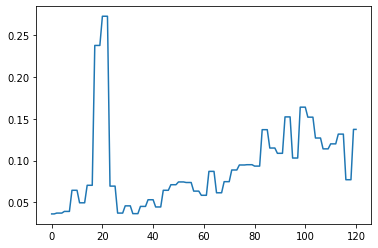

In [326]:
print("train shape:",trainData.shape," label shape:",labelData.shape)
plt.plot(trainData[0][0]) 
plt.show()

In [356]:
# define LSTM
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(labelData.shape[1], activation='sigmoid')))
model.add(layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_29 (Bidirectio (None, 2, 256)            256000    
_________________________________________________________________
time_distributed_19 (TimeDis (None, 2, 1)              257       
_________________________________________________________________
flatten_4 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 3         
Total params: 256,260
Trainable params: 256,260
Non-trainable params: 0
_________________________________________________________________


In [357]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/500
1/1 [==============================] - 1s 623ms/step - loss: 0.7039 - accuracy: 0.5000 - val_loss: 0.7466 - val_accuracy: 0.1429
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 0.6998 - accuracy: 0.5000 - val_loss: 0.7259 - val_accuracy: 0.1429
Epoch 3/500
1/1 [==============================] - 0s 21ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.1429
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 0.6880 - accuracy: 0.5000 - val_loss: 0.6869 - val_accuracy: 0.8571
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6874 - accuracy: 0.7083 - val_loss: 0.6803 - val_accuracy: 0.8571
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6870 - accuracy: 0.7083 - val_loss: 0.6817 - val_accuracy: 0.8571
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6897 - accuracy: 0.6667 - val_loss: 0.6800 - val_accuracy: 0.8571
Epoch 8/500
1/1 [==

In [348]:
e = 1
y_pred = model.predict(np.array(trainData))
# print(np.array([trainData[0]]).shape)
print(labelData)
y_pred

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[0.22047961],
       [0.22122195],
       [0.21991342],
       [0.21997008],
       [0.8110038 ],
       [0.8110837 ],
       [0.8111279 ],
       [0.8110986 ],
       [0.8109262 ],
       [0.81082964],
       [0.81056905],
       [0.81099933],
       [0.8098495 ],
       [0.81068575],
       [0.8109173 ],
       [0.81084585],
       [0.8111222 ],
       [0.8111086 ],
       [0.2199134 ],
       [0.21991321],
       [0.21991369],
       [0.22001326],
       [0.22035939],
       [0.22013643],
       [0.22022069],
       [0.81108147],
       [0.8110393 ],
       [0.81104904],
       [0.81046134],
       [0.81105554],
       [0.8110918 ]], dtype=float32)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


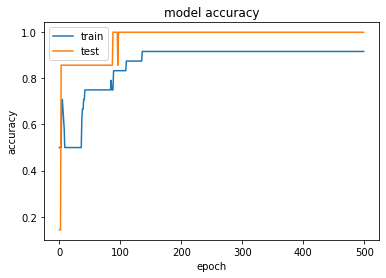

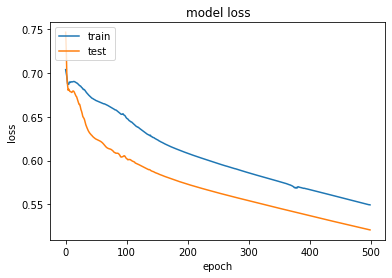

In [358]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Work with All

1622491650-tan-k3
dataTrain.shape: (1, 12, 439)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 318  to: 439
breakdata: (4, 12, 121)
1622467500-tan-k3
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-k2
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-km
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622539650-tan-k3
dataTrain.shape: (1, 12, 235)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 1
from: 0  to: 121
from: 114  to: 2

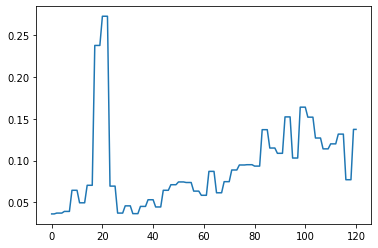

In [482]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

trainData.shape
trainData = np.delete(trainData, [1,2,3,9,10,11], 1)
# trainData = np.delete(trainData, [1,2,3,4,5,6,7,8,9,10,11], 1)
# trainData = np.delete(trainData, [1,2,3,4,5,7,8,9,10,11], 1)

print("train shape:",trainData.shape," label shape:",labelData.shape)
plt.plot(trainData[0][0]) 
plt.show()

In [445]:
np.corrcoef(trainData[1])

array([[ 1.        ,         nan, -0.89552787,         nan,         nan,
        -0.16596963,  0.39922993, -0.39922993,  0.76274399, -0.16573567,
         0.30065794,  0.148765  ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [-0.89552787,         nan,  1.        ,         nan,         nan,
         0.20414528, -0.35629171,  0.35629171, -0.58376676,  0.18293663,
        -0.24537781, -0.16420411],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [-0.16596963,         nan,  0.20414528,         nan,         nan,
         1.        , -

In [443]:
x = [ (2, 12, 8,9), (3, 15, 10,10), (1, 10, 6,10) ]
data = np.array([[e[1] for e in x], [e[2] for e in x]])
data = np.array(x)
print(data)
print(data.shape)
np.corrcoef(data)

[[ 2 12  8  9]
 [ 3 15 10 10]
 [ 1 10  6 10]]
(3, 4)


array([[1.        , 0.99106572, 0.9443495 ],
       [0.99106572, 1.        , 0.89370658],
       [0.9443495 , 0.89370658, 1.        ]])

In [483]:
trainShape = trainData.shape
trainData = trainData.reshape(trainShape[0],trainShape[1],trainShape[2],1)

In [484]:
# define model
model = keras.Sequential()
model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'), input_shape=(trainData.shape[1], trainData.shape[2],1)))
model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')))
model.add(keras.layers.TimeDistributed(keras.layers.Dropout(0.5)))
model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=3)))
model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
model.add(keras.layers.LSTM(200))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_138 (TimeDi (None, 6, 117, 64)        384       
_________________________________________________________________
time_distributed_139 (TimeDi (None, 6, 113, 64)        20544     
_________________________________________________________________
time_distributed_140 (TimeDi (None, 6, 113, 64)        0         
_________________________________________________________________
time_distributed_141 (TimeDi (None, 6, 37, 64)         0         
_________________________________________________________________
time_distributed_142 (TimeDi (None, 6, 2368)           0         
_________________________________________________________________
lstm_71 (LSTM)               (None, 200)               2055200   
_________________________________________________________________
dropout_50 (Dropout)         (None, 200)             

In [486]:
history = model.fit(
    trainData, labelData,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/30
1/1 [==============================] - 0s 72ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 2/30
1/1 [==============================] - 0s 52ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 3/30
1/1 [==============================] - 0s 54ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 4/30
1/1 [==============================] - 0s 55ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 5/30
1/1 [==============================] - 0s 54ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 6/30
1/1 [==============================] - 0s 47ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 7/30
1/1 [==============================] - 0s 65ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 8/30
1/1 [===========

In [429]:
# # define LSTM
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.TimeDistributed(keras.layers.Dense(128, activation='sigmoid')))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(labelData.shape[1], activation='sigmoid')))
model.add(keras.layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

#Ref: https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/
# model = keras.Sequential()
# model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,trainData.shape[1], trainData.shape[2])))
# model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')))
# model.add(keras.layers.TimeDistributed(keras.layers.Dropout(0.5)))
# model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling1D(pool_size=2)))
# model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
# model.add(keras.layers.LSTM(100))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()


Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_54 (Bidirectio (None, 12, 256)           256000    
_________________________________________________________________
time_distributed_80 (TimeDis (None, 12, 1)             257       
_________________________________________________________________
dropout_28 (Dropout)         (None, 12, 1)             0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 13        
Total params: 256,270
Trainable params: 256,270
Non-trainable params: 0
_________________________________________________________________


In [430]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/500
1/1 [==============================] - 1s 680ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 4/500
1/1 [==============================] - 0s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 7/500
1/1 [==============================] - 0s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.8571
Epoch 8/500
1/1 [==

KeyboardInterrupt: 

In [419]:
e = 1
y_pred = model.predict(np.array(trainData))
# print(np.array([trainData[0]]).shape)
print(labelData)
y_pred

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
e = 1
y_pred = model.predict(np.array(trainData))
# print(np.array([trainData[0]]).shape)
print(labelData)
y_pred

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


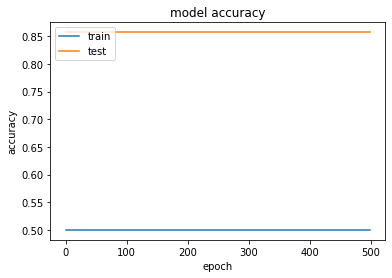

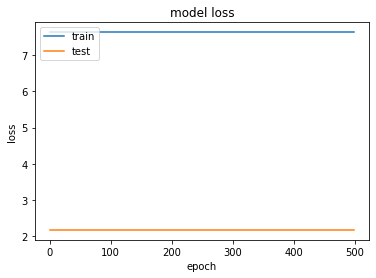

In [405]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [375]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'Sequential' object has no attribute 'coef_'

# Work with all - This solution work
# Solution: Only Bidirectional
## 5 features: 
- 0: cpu_system
- 4: pod_count
- 5: system_load
- 7: mem_avail
- 8: disk_io

In [735]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

trainData.shape
# trainData = np.delete(trainData, [1,2,3,9,10,11], 1)
trainData = np.delete(trainData, [1,2,3,6,9,10,11], 1)
# trainData = np.delete(trainData, [1,2,3,4,5,7,8,9,10,11], 1)

print("train shape:",trainData.shape," label shape:",labelData.shape)

1622491650-tan-k3
dataTrain.shape: (1, 12, 439)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 318  to: 439
breakdata: (4, 12, 121)
1622467500-tan-k3
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-k2
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-km
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622539650-tan-k3
dataTrain.shape: (1, 12, 235)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 1
from: 0  to: 121
from: 114  to: 2

In [608]:
# model = keras.Sequential()
# # model.add(keras.layers.LSTM(500, input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.Bidirectional(keras.layers.LSTM(500,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
# model.add(keras.layers.Dense(200))
# model.add(keras.layers.Dense(100))
# model.add(keras.layers.Dense(labelData.shape[1]))

# model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# model.summary()

# # # define LSTM
# # model = keras.Sequential()
# # model.add(keras.layers.Bidirectional(keras.layers.LSTM(500,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
# # model.add(keras.layers.Dense(200))
# # # model.add(keras.layers.Dense(100))
# # model.add(keras.layers.Dropout(0.5))
# # model.add(keras.layers.Flatten())
# # model.add(keras.layers.Dense(1, activation='sigmoid'))
# # # model.add(keras.layers.Dense(labelData.shape[1]))

# # model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# # model.summary()

# # model = models.Sequential()
# # model.add(layers.Conv2D(1, (2,2), activation='relu', input_shape=(12, 21, 1)))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(1, (2, 2), activation='relu'))
# # model.add(layers.Flatten())
# # model.add(layers.Dense(2))
# # model.summary()
# # keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


# # # define model
# # model = keras.Sequential()
# # model.add(keras.layers.TimeDistributed(layers.Conv2D(1, (2,2), activation='relu'), input_shape=(trainData.shape[1], trainData.shape[2],1)))
# # # model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'), input_shape=(trainData.shape[1], trainData.shape[2],1)))
# # # model.add(keras.layers.TimeDistributed(keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu')))
# # # model.add(keras.layers.TimeDistributed(keras.layers.Dropout(0.5)))
# # model.add(keras.layers.TimeDistributed(keras.layers.MaxPooling2D((2, 2))))
# # model.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
# # model.add(keras.layers.LSTM(200))
# # model.add(keras.layers.Dropout(0.5))
# # model.add(keras.layers.Dense(100, activation='relu'))
# # model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
# # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # model.summary()

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_78 (Bidirectio (None, 5, 1000)           2488000   
_________________________________________________________________
dense_220 (Dense)            (None, 5, 200)            200200    
_________________________________________________________________
dense_221 (Dense)            (None, 5, 100)            20100     
_________________________________________________________________
dense_222 (Dense)            (None, 5, 1)              101       
Total params: 2,708,401
Trainable params: 2,708,401
Non-trainable params: 0
_________________________________________________________________


In [737]:
model = keras.Sequential()
# model.add(keras.layers.LSTM(500, input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(500,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.Dense(500))
model.add(keras.layers.Dense(200))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(labelData.shape[1]))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(labelData.shape[1]))

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_135 (Bidirecti (None, 5, 1000)           2488000   
_________________________________________________________________
dense_497 (Dense)            (None, 5, 500)            500500    
_________________________________________________________________
dense_498 (Dense)            (None, 5, 200)            100200    
_________________________________________________________________
dense_499 (Dense)            (None, 5, 100)            20100     
_________________________________________________________________
dense_500 (Dense)            (None, 5, 1)              101       
Total params: 3,108,901
Trainable params: 3,108,901
Non-trainable params: 0
_________________________________________________________________


In [732]:
model = keras.Sequential()
# model.add(keras.layers.LSTM(500, input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(500,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(500)))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(200)))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(100)))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(1, activation='relu')))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(labelData.shape[1]))

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_132 (Bidirecti (None, 5, 1000)           2488000   
_________________________________________________________________
time_distributed_245 (TimeDi (None, 5, 500)            500500    
_________________________________________________________________
time_distributed_246 (TimeDi (None, 5, 200)            100200    
_________________________________________________________________
time_distributed_247 (TimeDi (None, 5, 100)            20100     
_________________________________________________________________
time_distributed_248 (TimeDi (None, 5, 1)              101       
Total params: 3,108,901
Trainable params: 3,108,901
Non-trainable params: 0
_________________________________________________________________


In [693]:
trainShape = trainData.shape
trainData = trainData.reshape(trainShape[0],trainShape[1],trainShape[2],1)
trainData.shape

(31, 5, 121, 1)

In [738]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/500
1/1 [==============================] - 1s 757ms/step - loss: 1.2840 - accuracy: 0.4917 - val_loss: 11.8975 - val_accuracy: 0.8571
Epoch 2/500
1/1 [==============================] - 0s 40ms/step - loss: 12.1665 - accuracy: 0.5000 - val_loss: 6.0189 - val_accuracy: 0.8571
Epoch 3/500
1/1 [==============================] - 0s 40ms/step - loss: 6.3082 - accuracy: 0.5000 - val_loss: 0.9675 - val_accuracy: 0.8571
Epoch 4/500
1/1 [==============================] - 0s 40ms/step - loss: 1.3070 - accuracy: 0.5000 - val_loss: 2.7996 - val_accuracy: 0.1429
Epoch 5/500
1/1 [==============================] - 0s 37ms/step - loss: 2.4494 - accuracy: 0.5000 - val_loss: 2.8423 - val_accuracy: 0.1429
Epoch 6/500
1/1 [==============================] - 0s 39ms/step - loss: 2.5006 - accuracy: 0.5000 - val_loss: 1.6085 - val_accuracy: 0.1429
Epoch 7/500
1/1 [==============================] - 0s 41ms/step - loss: 1.3015 - accuracy: 0.5000 - val_loss: 0.4502 - val_accuracy: 0.4857
Epoch 8/500
1/1 [

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


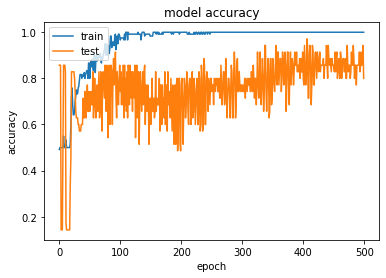

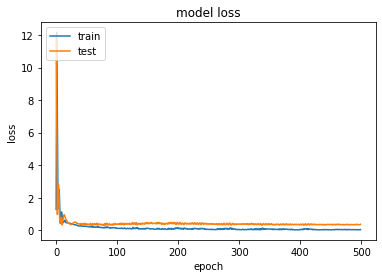

In [739]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [673]:
e = 1
y_pred = model.predict(np.array(trainData))
# print(np.array([trainData[0]]).shape)
print(labelData)
y_pred

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[[ 0.01287546],
        [-0.06408082],
        [-0.05259299],
        [ 0.24785352],
        [ 0.04032922]],

       [[-0.00435973],
        [-0.08607671],
        [-0.01231371],
        [-0.03045191],
        [-0.05056303]],

       [[ 0.0012667 ],
        [-0.05017463],
        [-0.04330444],
        [-0.02477917],
        [-0.09498663]],

       [[-0.01492132],
        [-0.08684112],
        [-0.03311557],
        [-0.03296395],
        [-0.09982605]],

       [[ 1.0259145 ],
        [ 0.95098495],
        [ 0.9686181 ],
        [ 0.9311256 ],
        [ 0.9585848 ]],

       [[ 1.0272979 ],
        [ 0.983362  ],
        [ 0.94089293],
        [ 0.94993   ],
        [ 0.9533358 ]],

       [[ 1.0303866 ],
        [ 0.9657695 ],
        [ 0.9707776 ],
        [ 1.0118399 ],
        [ 0.95931727]],

       [[ 1.0204312 ],
        [ 0.94119453],
        [ 0.98444694],
        [ 0.79386526],
        [ 0.9617047 ]],

       [[ 1.01601   ],
        [ 0.9667738 ],
        [ 0.952965

# Work with all - This solution work
# Solution: In processing
## 5 features: 
- 0: cpu_system
- 4: pod_count
- 5: system_load
- 7: mem_avail
- 8: disk_io

In [779]:
trainData,labelData = viewAllDataFromFolder("data","label",121)

trainData.shape
# trainData = np.delete(trainData, [1,2,3,9,10,11], 1)
trainData = np.delete(trainData, [1,2,3,6,9,10,11], 1)
# trainData = np.delete(trainData, [1,2,3,4,5,7,8,9,10,11], 1)

print("train shape:",trainData.shape," label shape:",labelData.shape)

1622491650-tan-k3
dataTrain.shape: (1, 12, 439)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 318  to: 439
breakdata: (4, 12, 121)
1622467500-tan-k3
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-k2
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622467500-tan-km
dataTrain.shape: (1, 12, 421)   dataLabel.shape: (1, 1)  label value: [1]
(1, 12, 121)
bCount: 3
from: 0  to: 121
from: 121  to: 242
from: 242  to: 363
from: 300  to: 421
breakdata: (4, 12, 121)
1622539650-tan-k3
dataTrain.shape: (1, 12, 235)   dataLabel.shape: (1, 1)  label value: [0]
(1, 12, 121)
bCount: 1
from: 0  to: 121
from: 114  to: 2

In [1]:
model = keras.Sequential()
# model.add(keras.layers.LSTM(500, input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(600,return_sequences=True), input_shape=[trainData.shape[1], trainData.shape[2]]))
model.add(keras.layers.Dense(500))
model.add(keras.layers.Dense(200))
model.add(keras.layers.Dense(50))
# model.add(keras.layers.Dense(labelData.shape[1], activation='softmax'))
# model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(labelData.shape[1], activation='sigmoid' ))

# model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

NameError: name 'keras' is not defined

In [4]:
history = model.fit(
    trainData, labelData,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

NameError: name 'model' is not defined

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


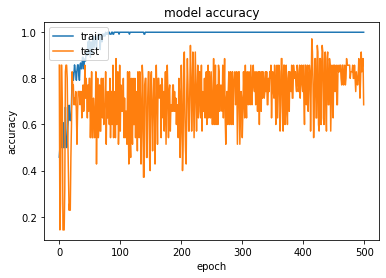

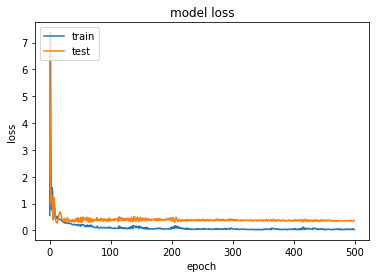

In [757]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [769]:
e = 1
y_pred = model.predict(np.array(trainData))
# print(np.array([trainData[0]]).shape)
print(labelData)
y_pred

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)